# Movie and Director Trends Analysis

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# Load the processed data
data_path = '../data/imdb_top_movies_cleaned.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,title,year,rating,genre,directors,revenue,lead_actors
0,The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
1,The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Marlon Brando, Mario Puzo, Peter Cl...",250342198,"Al Pacino, Marlon Brando, James Caan"
2,The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Salvatore Maroni, Michael Caine, Christian Bal...",1009057329,"Christian Bale, Aaron Eckhart, Heath Ledger"
3,The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Livio Giorgi, Al Pacino, Mario Puzo, Francis F...",47964222,"Al Pacino, Robert De Niro, Robert Duvall"
4,12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Jack Warden, Lee J. Cobb, Sidney Lumet, Regina...",2945,"Henry Fonda, Martin Balsam, Lee J. Cobb"


In [163]:
# Explode multiple directors and actors into separate rows for analysis
df_exploded_directors = df.assign(directors=df["directors"].str.split(", ")).explode("directors")
df_exploded_actors = df.assign(lead_actors=df["lead_actors"].str.split(", ")).explode("lead_actors")
print(len(df_exploded_directors))
print(len(df_exploded_actors))

2475
748


## 1. Most Recurrent Directors and Actors
### **Explanation:**
- This analysis identifies the **most frequently appearing directors and actors** in the IMDb top movies dataset.
- The dataset is processed to extract individual directors and lead actors from the provided list format.
- The top 20 most frequent directors and actors are visualized using **bar plots**, showing their influence on high-quality films.
- Directors and actors with a high count indicate **consistent success** in top-rated movies.

In [164]:
# --- 1. Most Recurrent Directors and Actors ---
# Count the most frequent directors
director_counts = df_exploded_directors["directors"].value_counts().head(20)
director_counts

directors
Robert De Niro       9
Christopher Nolan    8
Steven Spielberg     8
Martin Scorsese      7
Tom Hanks            7
Stanley Kubrick      7
Christian Bale       6
Alfred Hitchcock     6
Akira Kurosawa       6
Leonardo DiCaprio    6
Harrison Ford        6
Quentin Tarantino    5
James Stewart        5
Pete Docter          5
Jonathan Nolan       5
Jack Nicholson       5
Mark Ruffalo         5
George Lucas         5
Charles Chaplin      5
Billy Wilder         5
Name: count, dtype: int64

In [165]:
# Count the most frequent lead actors
actor_counts = df_exploded_actors["lead_actors"].value_counts().head(20)
actor_counts

lead_actors
Robert De Niro       9
Harrison Ford        6
Leonardo DiCaprio    6
Tom Hanks            6
Clint Eastwood       5
Matt Damon           5
Charles Chaplin      5
Christian Bale       5
Toshirô Mifune       4
James Stewart        4
Kevin Spacey         4
Jack Nicholson       4
Mark Ruffalo         4
Brad Pitt            4
Tatsuya Nakadai      4
Morgan Freeman       4
Al Pacino            4
Viggo Mortensen      3
Henry Fonda          3
Joaquin Phoenix      3
Name: count, dtype: int64

/var/folders/zy/l_s5vzv53fz8ysl24mcw4m_h0000gn/T/ipykernel_42463/549392937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette="magma")


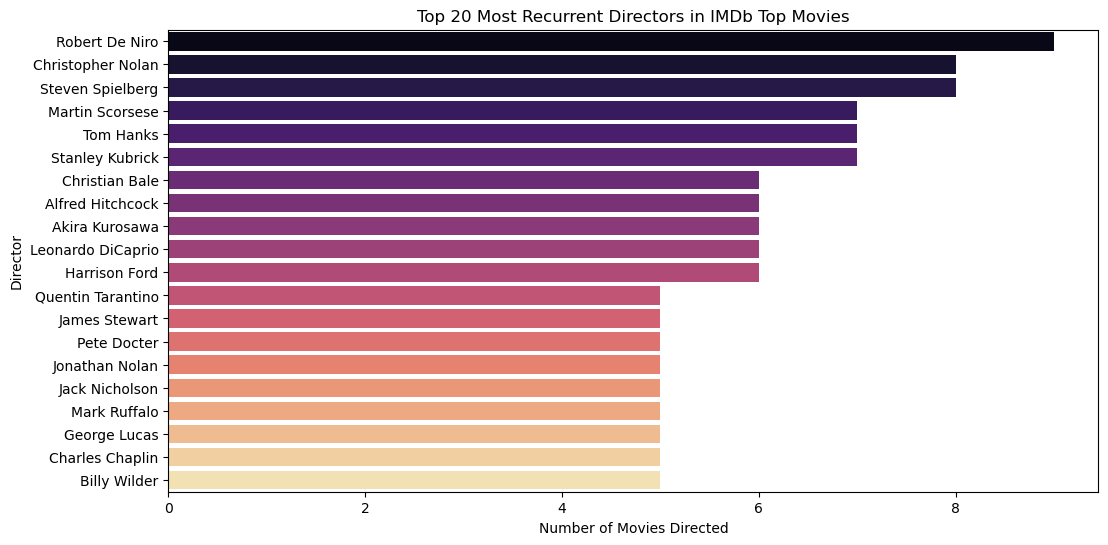

In [166]:
# Bar plot for Most Recurrent Directors
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette="magma")
plt.xlabel("Number of Movies Directed")
plt.ylabel("Director")
plt.title("Top 20 Most Recurrent Directors in IMDb Top Movies")
plt.show()

/var/folders/zy/l_s5vzv53fz8ysl24mcw4m_h0000gn/T/ipykernel_42463/429603409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="coolwarm")


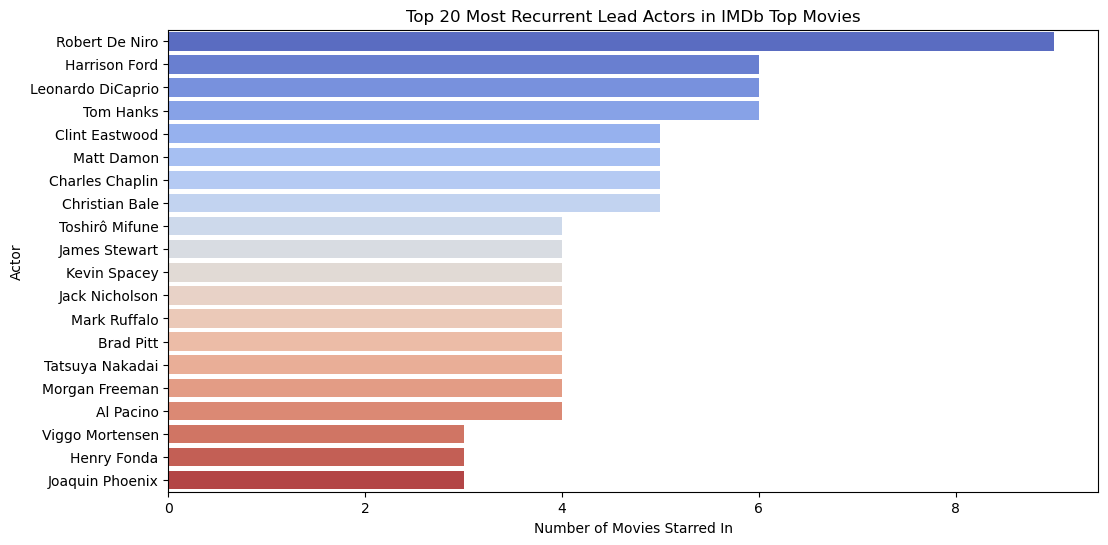

In [167]:
# Bar plot for Most Recurrent Lead Actors
plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="coolwarm")
plt.xlabel("Number of Movies Starred In")
plt.ylabel("Actor")
plt.title("Top 20 Most Recurrent Lead Actors in IMDb Top Movies")
plt.show()

## 2. Trends in the Number of Movies Directed by Prominent Directors
### **Explanation:**
- This section analyzes the **evolution of film production by top directors over the years**.
- A **line plot** is generated to track the number of movies directed by the top 10 most frequent directors over time.
- This helps understand **when certain directors were most active** in producing successful films.
- Some directors may have peak creative periods, while others have long-standing careers with consistent output.

In [168]:
# --- 2. Trends in the Number of Movies Directed by Prominent Directors ---
# Count the number of movies directed by each director over time
director_trend = df_exploded_directors.groupby(["year", "directors"]).size().unstack(fill_value=0)

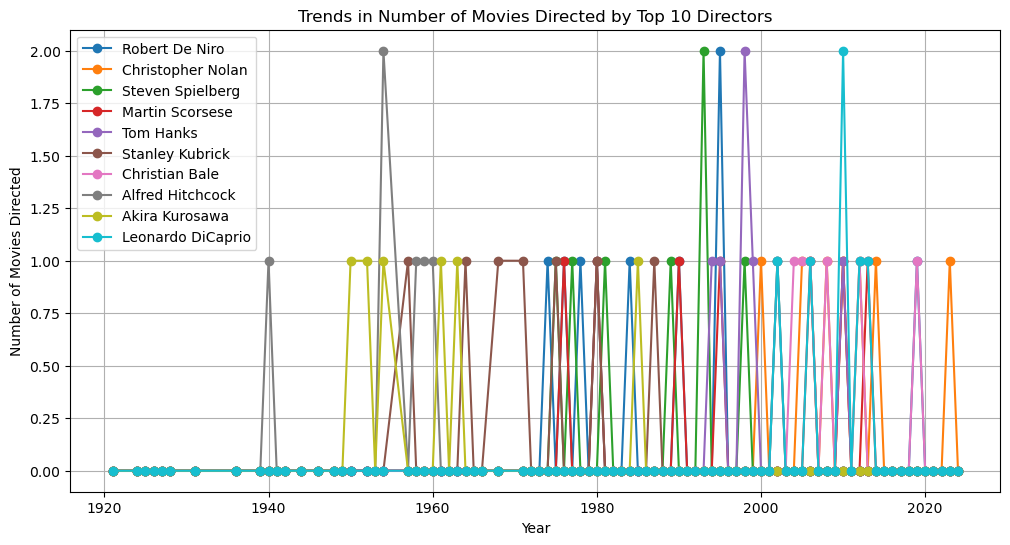

In [169]:
# Select top 10 most frequent directors for trend analysis
top_directors = director_counts.index[:10]

# Line plot for movie trends of top directors
plt.figure(figsize=(12, 6))
for director in top_directors:
    plt.plot(director_trend.index, director_trend[director], marker="o", label=director)

plt.xlabel("Year")
plt.ylabel("Number of Movies Directed")
plt.title("Trends in Number of Movies Directed by Top 10 Directors")
plt.legend()
plt.grid(True)
plt.show()

## 3. Influence of Directors on Movie Success
### **Explanation:**
- This part evaluates **the financial impact of directors** on box office performance.
- The dataset is grouped by director names, and the **average revenue of movies** directed by each is calculated.
- A **bar plot** is created to showcase the **top 20 highest-earning directors**.
- Directors consistently producing blockbuster hits demonstrate **a significant financial influence** in the film industry.

/var/folders/zy/l_s5vzv53fz8ysl24mcw4m_h0000gn/T/ipykernel_42463/1670979256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="viridis")


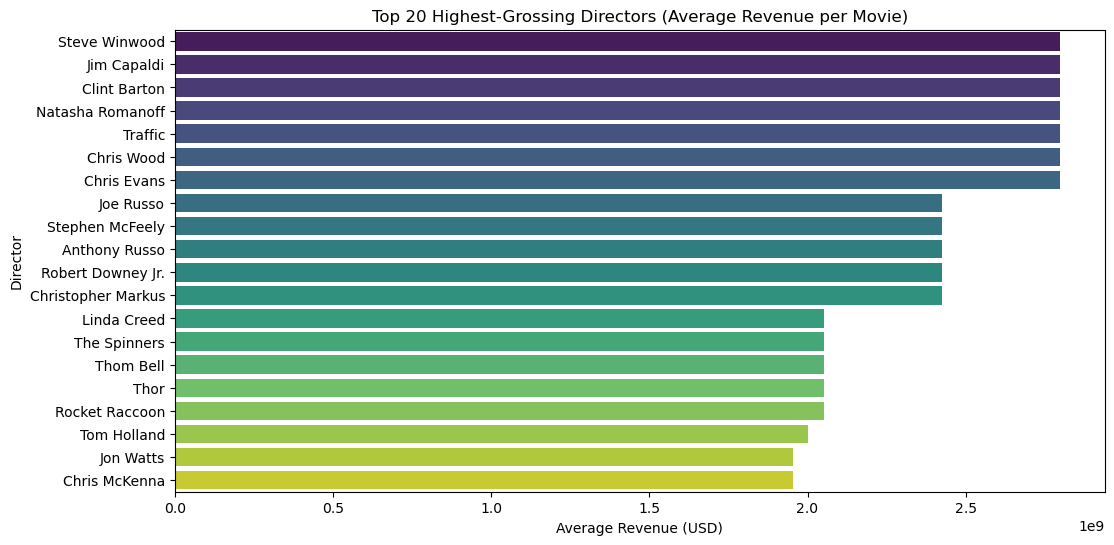

In [170]:
# --- 3. Influence of Directors on Movie Success ---
# Average revenue per director
director_revenue = df_exploded_directors.groupby("directors")["revenue"].mean().sort_values(ascending=False).head(20)

# Bar plot for top 20 highest-earning directors
plt.figure(figsize=(12, 6))
sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="viridis")
plt.xlabel("Average Revenue (USD)")
plt.ylabel("Director")
plt.title("Top 20 Highest-Grossing Directors (Average Revenue per Movie)")
plt.show()

## 4. Evolution of Film Styles (Genre Trends Over Time)
### **Explanation:**
- This analysis tracks **changes in genre preferences over the years**.
- The dataset is processed to separate individual genres for each movie.
- A **line plot** is used to visualize the frequency of the top 10 most common genres over time.
- This highlights how audience preferences have shifted, with genres like **action, superhero, or sci-fi** increasing in popularity.
- Older genres like **drama, war, and noir** may show a declining trend, reflecting changing storytelling methods and audience demand.

In [171]:
# --- 4. Evolution of Film Styles (Genre Trends Over Time) ---
# Split genres into separate rows for analysis
df_exploded_genres = df.assign(genre=df["genre"].str.split(", ")).explode("genre")
df_exploded_genres.head()

,title,year,rating,genre,directors,revenue,lead_actors
0,The Shawshank Redemption,1994,9.3,Epic,"Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
0,The Shawshank Redemption,1994,9.3,Period Drama,"Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
0,The Shawshank Redemption,1994,9.3,Prison Drama,"Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
0,The Shawshank Redemption,1994,9.3,Drama,"Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
1,The Godfather,1972,9.2,Epic,"Al Pacino, Marlon Brando, Mario Puzo, Peter Cl...",250342198,"Al Pacino, Marlon Brando, James Caan"


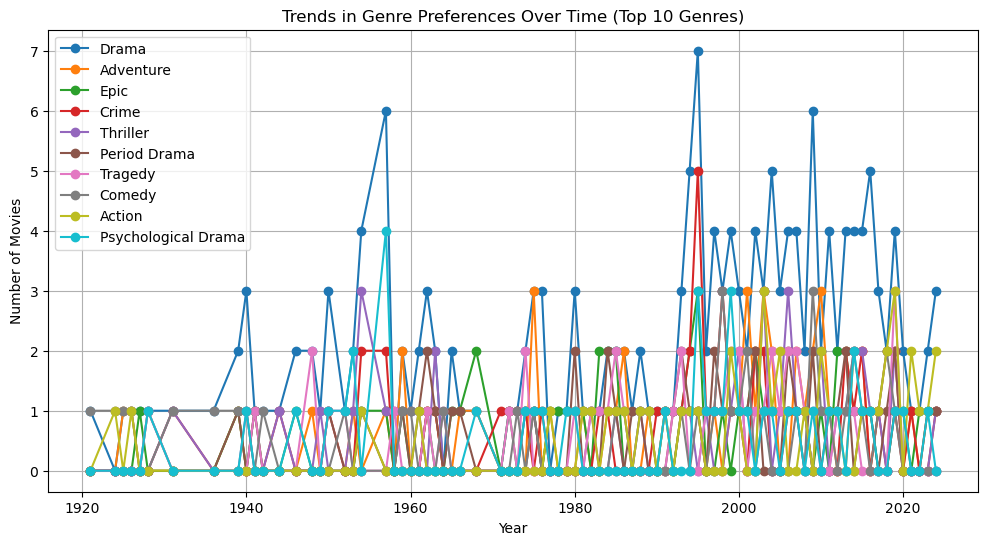

In [172]:

# Count genre distribution over time
genre_trends = df_exploded_genres.groupby(["year", "genre"]).size().unstack(fill_value=0)

# Select top 10 most frequent genres for trend analysis
top_genres = df_exploded_genres["genre"].value_counts().index[:10]

# Line plot for genre trends over the years
plt.figure(figsize=(12, 6))
for genre in top_genres:
    plt.plot(genre_trends.index, genre_trends[genre], marker="o", label=genre)

plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Trends in Genre Preferences Over Time (Top 10 Genres)")
plt.legend()
plt.grid(True)
plt.show()